# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est potentiellement un commentaire, que nous ignorons en précisant `comment=1`. Si le fichier existe déjà en version locale, nous l'utilisons sinon nous téléchargeons l'url précisée et la sauvegardons en local pour pouvoir la réutiliser plus tard.

In [3]:
fname = data_url.split('/')[-1]
if os.path.isfile(fname):
    print("Reading local version")
    raw_data = pd.read_csv(fname, comment='#')
else:
    print("Downloading remote version at", data_url)
    raw_data = pd.read_csv(data_url, comment='#')
    raw_data.to_csv(fname)
raw_data

Reading local version


Unnamed: 0    week  indicator    inc  inc_low  inc_up  inc100  \
0              0  202018          7    861       88    1634       1   
1              1  202017          7    272        0     658       0   
2              2  202016          7    758       78    1438       1   
3              3  202015          7   1918      675    3161       3   
4              4  202014          7   3879     2227    5531       6   
5              5  202013          7   7326     5236    9416      11   
6              6  202012          7   8123     5790   10456      12   
7              7  202011          7  10198     7568   12828      15   
8              8  202010          7   9011     6691   11331      14   
9              9  202009          7  13631    10544   16718      21   
10            10  202008          7  10424     7708   13140      16   
11            11  202007          7   8959     6574   11344      14   
12            12  202006          7   9264     6925   11603      14   
13            13  202005          7   8505     6314   10696      13   
14            14  202004          7   7991     5831   10151      12   
15            15  202003          7   5968     4100    7836       9   
16            16  202002          7   6534     4530    8538      10   
17            17  202001          7   9835     7019   12651      15   
18            18  201952          7   7941     5246   10636      12   
19            19  201951          7   5823     3675    7971       9   
20            20  201950          7   6424     4276    8572      10   
21            21  201949          7   6621     4540    8702      10   
22            22  201948          7   5542     3383    7701       8   
23            23  201947          7   7536     5058   10014      11   
24            24  201946          7   2638     1316    3960       4   
25            25  201945          7   4492     2615    6369       7   
26            26  201944          7   5728     3627    7829       9   
27            27  201943          7   4834     2751    6917       7   
28            28  201942          7   6279     3989    8569      10   
29            29  201941          7   4130     2030    6230       6   
...          ...     ...        ...    ...      ...     ...     ...   
1505        1505  199126          7  17608    11304   23912      31   
1506        1506  199125          7  16169    10700   21638      28   
1507        1507  199124          7  16171    10071   22271      28   
1508        1508  199123          7  11947     7671   16223      21   
1509        1509  199122          7  15452     9953   20951      27   
1510        1510  199121          7  14903     8975   20831      26   
1511        1511  199120          7  19053    12742   25364      34   
1512        1512  199119          7  16739    11246   22232      29   
1513        1513  199118          7  21385    13882   28888      38   
1514        1514  199117          7  13462     8877   18047      24   
1515        1515  199116          7  14857    10068   19646      26   
1516        1516  199115          7  13975     9781   18169      25   
1517        1517  199114          7  12265     7684   16846      22   
1518        1518  199113          7   9567     6041   13093      17   
1519        1519  199112          7  10864     7331   14397      19   
1520        1520  199111          7  15574    11184   19964      27   
1521        1521  199110          7  16643    11372   21914      29   
1522        1522  199109          7  13741     8780   18702      24   
1523        1523  199108          7  13289     8813   17765      23   
1524        1524  199107          7  12337     8077   16597      22   
1525        1525  199106          7  10877     7013   14741      19   
1526        1526  199105          7  10442     6544   14340      18   
1527        1527  199104          7   7913     4563   11263      14   
1528        1528  199103          7  15387    10484   20290      27   
1529        1529  199102      

Y a-t-il des points manquants dans ce jeux de données ? A priori, non.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous copions les données en éliminant les éventuelles lignes sans données.

In [5]:
data = raw_data.dropna().copy()

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit de nombre entier. C'est comme ça que Pandas les interprète.
 
Un deuxième problème est que Pandas ne comprend pas les numéros de semaine. Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque isoweek.

Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.


In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in raw_data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [7]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur" d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives entre lesquelles il manque une semaine.

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

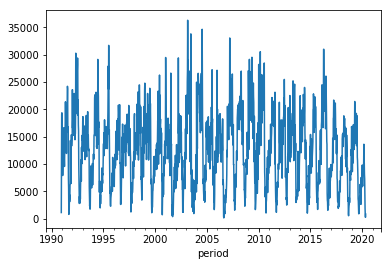

In [9]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

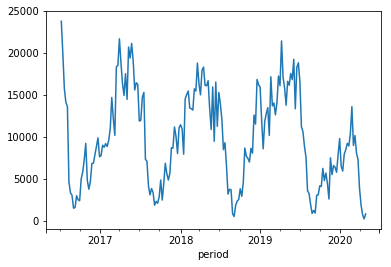

In [10]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval entre deux années civiles, nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année $N$ au 1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er septembre de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de syndrome grippal est très faible en été, cette modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent en décembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse à partir du 1er septembre 1991.

In [11]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

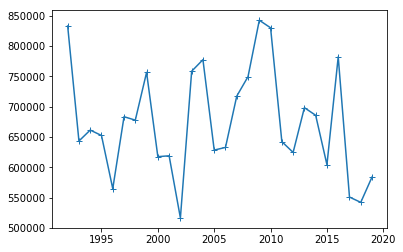

In [13]:
yearly_incidence.plot(style='-+')

In [14]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

On ne souhaite que les années min et max d'incidence.